# 선형모델

In [40]:
import setting
import mglearn
%matplotlib notebook

w[0]: 0.393906  b: -0.031804


<IPython.core.display.Javascript object>


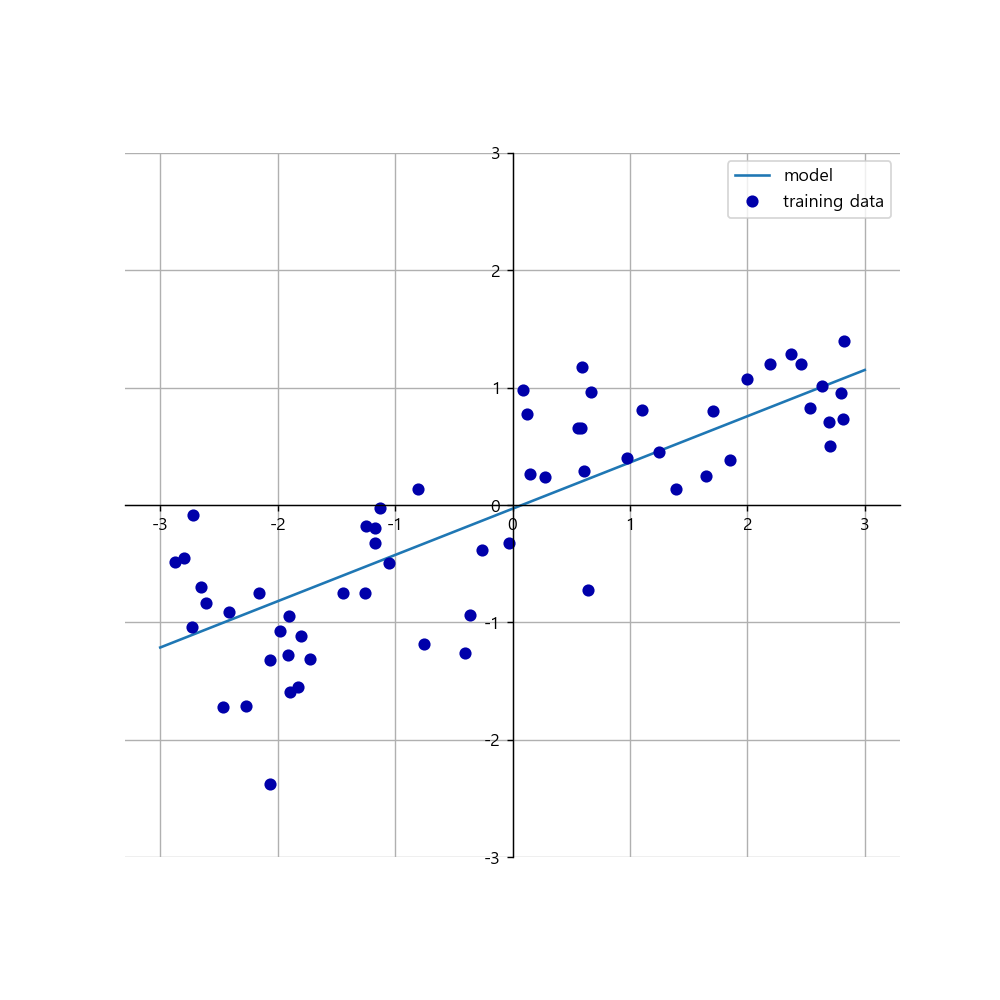

In [8]:
mglearn.plots.plot_linear_regression_wave()

## 선형회귀

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [12]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
print('lr.coef_:',lr.coef_)
print('lr.intercept_:',lr.intercept_)

lr.coef_: [0.44153666]
lr.intercept_: -0.01711124414733381


In [18]:
print('훈련세트 점수 : {:.2f}'.format(lr.score(X_train,y_train))) # R^2값으로 평가한다.
print('테스트세트 점수: {:.2f}'.format(lr.score(X_test,y_test)))

# 두가지 값의 차이가 거의 없고 좋지않은 점수 -> 과소적합

훈련세트 점수 : 0.66
테스트세트 점수: 0.69


In [22]:
# 보스턴 주택가격 데이터
X,y = mglearn.datasets.load_extended_boston()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [23]:
print('훈련세트 점수 :{:.2f}'.format(lr.score(X_train,y_train)))
print('테스트세트 점수:{:.2f}'.format(lr.score(X_test,y_test)))
# 훈련세트 점수가 높고, 테스트세트 점수가 낮다 -> 과대적합

훈련세트 점수 :0.95
테스트세트 점수:0.61


### 릿지 회귀
- 파라미터
    1. alpha : 학습률 높을 수록 규제가 심해진다.(default = 1.0

In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print('훈련세트 점수 :{:.2f}'.format(ridge.score(X_train,y_train)))
print('테스트세트 점수:{:.2f}'.format(ridge.score(X_test,y_test)))

훈련세트 점수 :0.89
테스트세트 점수:0.75


In [25]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print('훈련세트 점수 :{:.2f}'.format(ridge10.score(X_train,y_train)))
print('테스트세트 점수:{:.2f}'.format(ridge10.score(X_test,y_test)))

훈련세트 점수 :0.79
테스트세트 점수:0.64


In [26]:
def ridge_(n):
    ridge = Ridge(alpha=n).fit(X_train,y_train)
    print('훈련세트 점수 :{:.2f}'.format(ridge.score(X_train,y_train)))
    print('테스트세트 점수:{:.2f}'.format(ridge.score(X_test,y_test)))

In [37]:
ridge_(0.1)

훈련세트 점수 :0.93
테스트세트 점수:0.77


<IPython.core.display.Javascript object>


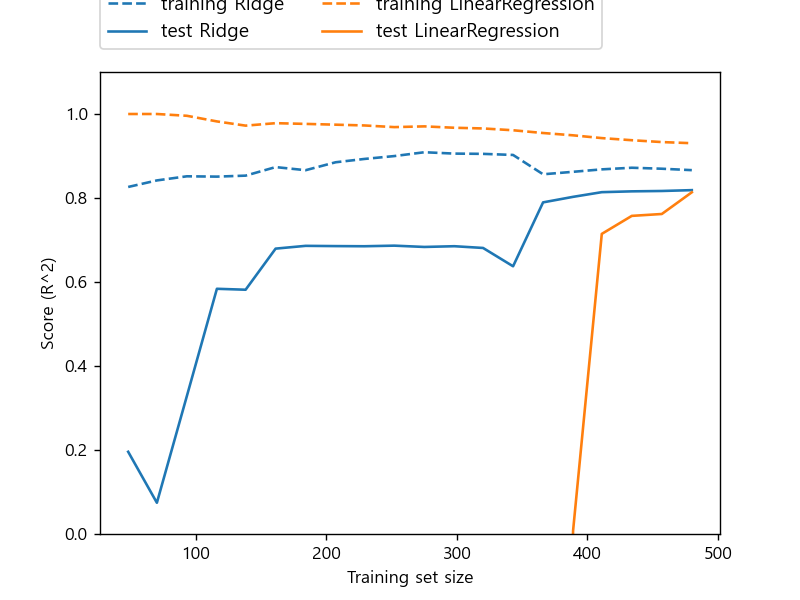

In [44]:
# 학습곡선
import matplotlib.pyplot as plt
plt.figure()
mglearn.plots.plot_ridge_n_samples()

In [45]:
import numpy as np

### 라쏘 회귀
- parameta
    1. alpha : 학습률 높을 수록 계수가 0이 되는 feateur가 많아 진다.(default =1)
    2. max_iter : 반복할 최대 회수 alpha를 줄이면 늘려주는 것이 좋다. (100000으로)

In [46]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print('train set score: {:.2f}'.format(lasso.score(X_train,y_train)))
print('test set score: {:.2f}'.format(lasso.score(X_test,y_test)))
print('number of using feature:',np.sum(lasso.coef_ !=0))

train set score: 0.29
test set score: 0.21
number of using feature: 4


In [63]:
def lasso_(n,m):
    lasso = Lasso(alpha=n,max_iter=m).fit(X_train,y_train)
    print('train set score: {:.2f}'.format(lasso.score(X_train,y_train)))
    print('test set score: {:.2f}'.format(lasso.score(X_test,y_test)))
    print('number of using feature:',np.sum(lasso.coef_ !=0))

In [79]:
lasso_(0.005,100000000)

train set score: 0.92
test set score: 0.78
number of using feature: 43


## 분류용 모델

### 로지스틱 회귀와 SVM (이진 분류)

- parameta
    1. C : 클 수록 규제가 감소한다. default =1
- 규제
    - 로지스틱 : 기본으로 L2규제를 이용 solver=liblinear, penalty=l1 변수를 변경하여 L1규제 사용가능

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [87]:
len(y),len(X)

(26, 26)

<IPython.core.display.Javascript object>


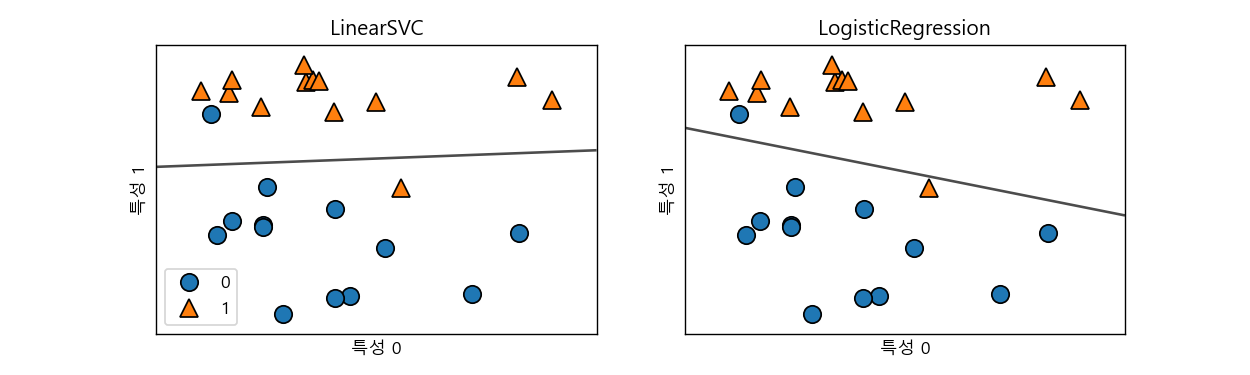

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [91]:
fig, axes = plt.subplots(1,2,figsize=(10,3))

for model ,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,ax=ax,alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend()

<IPython.core.display.Javascript object>


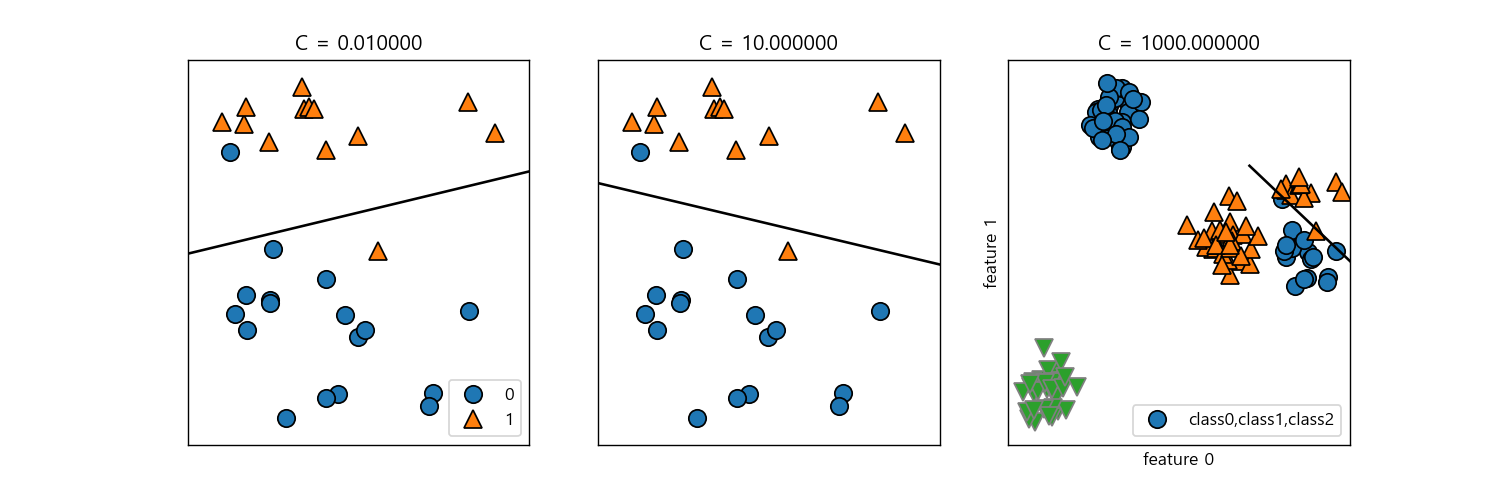

In [93]:
mglearn.plots.plot_linear_svc_regularization()

In [94]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)
print('train set score: {:.3f}'.format(logreg.score(X_train,y_train)))
print('test set score: {:.3f}'.format(logreg.score(X_test,y_test)))

train set score: 0.944
test set score: 0.958


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [95]:
def log_(n):
    logreg = LogisticRegression(C=n).fit(X_train,y_train)
    print('train set score: {:.3f}'.format(logreg.score(X_train,y_train)))
    print('test set score: {:.3f}'.format(logreg.score(X_test,y_test)))

In [98]:
log_(100)

train set score: 0.958
test set score: 0.951


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [101]:
for C, marker in zip([0.001,1,100],['o','^','∨']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty='l1').fit(X_train,y_train)
    print('C={} => train set score: {:.3f}'.format(C,lr_l1.score(X_train,y_train)))
    print('C={} => test set score: {:.3f}'.format(C,lr_l1.score(X_test,y_test)))

C=0.001 => train set score: 0.913
C=0.001 => test set score: 0.923
C=1 => train set score: 0.960
C=1 => test set score: 0.958
C=100 => train set score: 0.986
C=100 => test set score: 0.979


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## 다중 클레스 분류 선형 모델

<IPython.core.display.Javascript object>


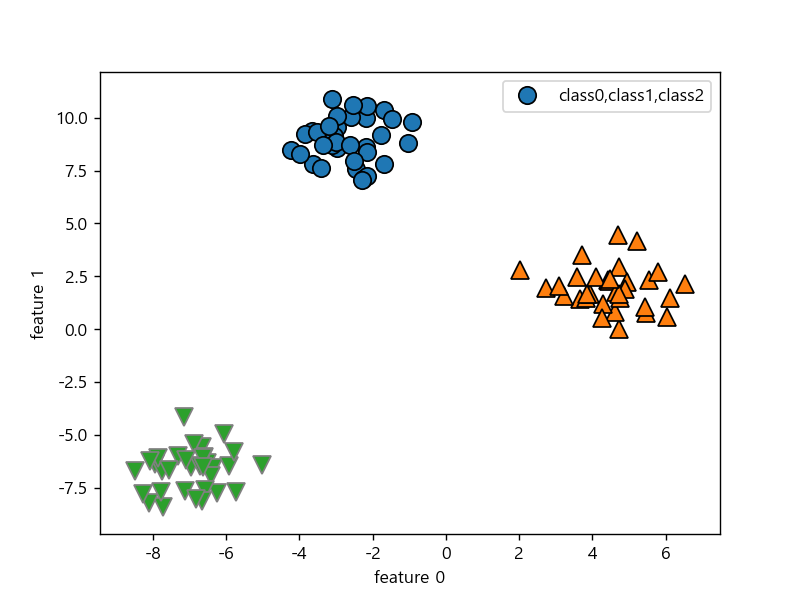

In [110]:
from sklearn.datasets import make_blobs
plt.figure()
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class0,class1,class2'])

In [106]:
linear_svm = LinearSVC().fit(X,y)
print('계수 배열의 크기: ', linear_svm.coef_.shape)
print('절편 배열의 크기: ',linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


<IPython.core.display.Javascript object>


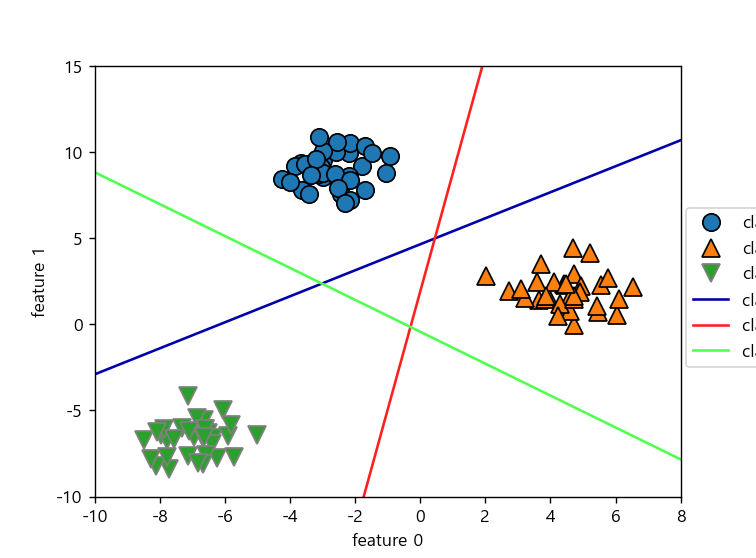

In [116]:
plt.figure()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15, 15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class0','class1','class2','class0 경계','class1 경계','class2 경계'],loc=(1.01,0.3))